In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [9]:
df=pd.read_csv('MSFT.csv')

In [10]:
df.head(5)

Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.061434  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.063628   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.064725   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.063079    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.061982    47894400

In [12]:
#Get the know more about the data
df.shape

(9083, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9083 non-null   object 
 1   Open       9083 non-null   float64
 2   High       9083 non-null   float64
 3   Low        9083 non-null   float64
 4   Close      9083 non-null   float64
 5   Adj Close  9083 non-null   float64
 6   Volume     9083 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 496.9+ KB


In [16]:
#some basic statistics
df.describe().style.background_gradient(cmap ="copper")

In [17]:
df.describe(include=object).style.background_gradient(cmap = 'copper')

In [18]:
df["High"].value_counts()


27.500000     17
0.381944      15
26.000000     15
0.369792      15
0.364583      15
              ..
1.817708       1
1.781250       1
1.765625       1
1.718750       1
304.200012     1
Name: High, Length: 5163, dtype: int64

In [19]:
df["Low"].value_counts()

25.500000     18
0.378472      17
27.000000     17
2.656250      17
0.359375      16
              ..
28.735001      1
29.785000      1
29.094999      1
30.254999      1
298.320007     1
Name: Low, Length: 5183, dtype: int64

In [21]:
df["Close"].value_counts()

0.361111      16
27.250000     13
0.359375      12
0.345486      12
2.460938      12
              ..
2.630208       1
2.513021       1
2.596354       1
2.614583       1
304.100006     1
Name: Close, Length: 5373, dtype: int64

In [23]:
df["Volume"].value_counts()

18316800    4
51825600    3
48729600    3
54547200    3
69436800    3
           ..
36546800    1
48388400    1
59322800    1
52402800    1
24446900    1
Name: Volume, Length: 8901, dtype: int64

In [25]:
current_decade =df[df["Low"] > 0.091146]
current_decade

Date        Open        High         Low       Close   Adj Close  \
1     1986-03-14    0.097222    0.102431    0.097222    0.100694    0.063628   
2     1986-03-17    0.100694    0.103299    0.100694    0.102431    0.064725   
3     1986-03-18    0.102431    0.103299    0.098958    0.099826    0.063079   
4     1986-03-19    0.099826    0.100694    0.097222    0.098090    0.061982   
5     1986-03-20    0.098090    0.098090    0.094618    0.095486    0.060337   
...          ...         ...         ...         ...         ...         ...   
9078  2022-03-18  295.369995  301.000000  292.730011  300.429993  300.429993   
9079  2022-03-21  298.890015  300.140015  294.899994  299.160004  299.160004   
9080  2022-03-22  299.799988  305.000000  298.769989  304.059998  304.059998   
9081  2022-03-23  300.510010  303.230011  297.720001  299.489990  299.489990   
9082  2022-03-24  299.140015  304.200012  298.320007  304.100006  304.100006   

         Volume  
1     308160000  
2     133171200  
3      67766400  
4      47894400  
5      58435200  
...         ...  
9078   43317000  
9079   28351200  
9080   27599700  
9081   25715400  
9082   24446900  

[9076 rows x 7 columns]

In [26]:
current_decade =df[df["High"] > 0.098090]
current_decade

Date        Open        High         Low       Close   Adj Close  \
0     1986-03-13    0.088542    0.101563    0.088542    0.097222    0.061434   
1     1986-03-14    0.097222    0.102431    0.097222    0.100694    0.063628   
2     1986-03-17    0.100694    0.103299    0.100694    0.102431    0.064725   
3     1986-03-18    0.102431    0.103299    0.098958    0.099826    0.063079   
4     1986-03-19    0.099826    0.100694    0.097222    0.098090    0.061982   
...          ...         ...         ...         ...         ...         ...   
9078  2022-03-18  295.369995  301.000000  292.730011  300.429993  300.429993   
9079  2022-03-21  298.890015  300.140015  294.899994  299.160004  299.160004   
9080  2022-03-22  299.799988  305.000000  298.769989  304.059998  304.059998   
9081  2022-03-23  300.510010  303.230011  297.720001  299.489990  299.489990   
9082  2022-03-24  299.140015  304.200012  298.320007  304.100006  304.100006   

          Volume  
0     1031788800  
1      308160000  
2      133171200  
3       67766400  
4       47894400  
...          ...  
9078    43317000  
9079    28351200  
9080    27599700  
9081    25715400  
9082    24446900  

[9063 rows x 7 columns]

In [27]:
print('Max is:',df.max())
print('Sum is:',df.sum())
print('Mean is:',df.mean())

Max is: Date         2022-03-24
Open         344.619995
High         349.670013
Low          342.200012
Close        343.109985
Adj Close    342.402008
Volume       1031788800
dtype: object
Sum is: Date         1986-03-131986-03-141986-03-171986-03-181986-0...
Open                                             375354.394619
High                                             379314.135717
Low                                              371299.310375
Close                                            375451.505415
Adj Close                                        329314.342455
Volume                                            533631280500
dtype: object
Mean is: Open         4.132494e+01
High         4.176089e+01
Low          4.087849e+01
Close        4.133563e+01
Adj Close    3.625612e+01
Volume       5.875055e+07
dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_7332\1693490754.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Mean is:',df.mean())


In [28]:
games_with_notes = df[df["Low"].notnull()]
games_with_notes.shape

(9083, 7)

<Axes: >

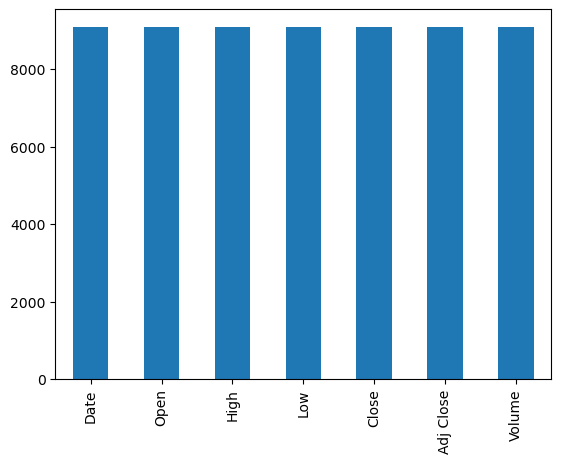

In [31]:
df.isnull().count().plot.bar()

In [ ]:
ax=sns.regplot(x='High',y='Low',data=df)

27.500000     17
0.381944      15
26.000000     15
0.369792      15
0.364583      15
              ..
1.817708       1
1.781250       1
1.765625       1
1.718750       1
304.200012     1
Name: High, Length: 5163, dtype: int64


<Axes: >

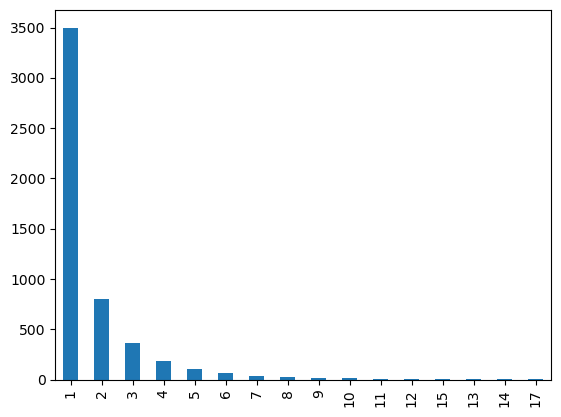

In [32]:
p = df['High'].value_counts()
print(p)
p.value_counts().plot.bar()

25.500000     18
0.378472      17
27.000000     17
2.656250      17
0.359375      16
              ..
28.735001      1
29.785000      1
29.094999      1
30.254999      1
298.320007     1
Name: Low, Length: 5183, dtype: int64


<Axes: >

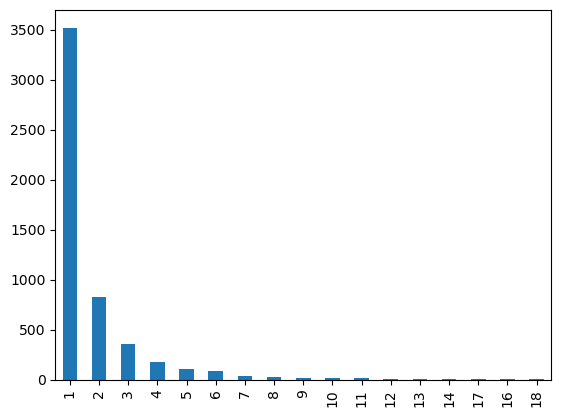

In [33]:
p = df['Low'].value_counts()
print(p)
p.value_counts().plot.bar()

In [34]:
px.parallel_coordinates(df, color="High",) 

C:\Users\HP\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


C:\Users\HP\AppData\Local\Temp\ipykernel_7332\2742163795.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='High', ylabel='Density'>

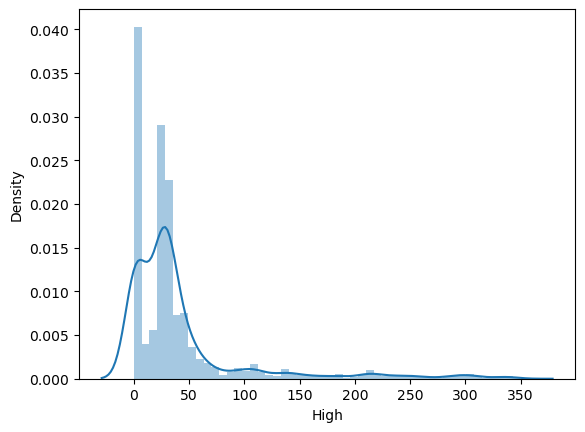

In [35]:
#Distributiong of Age variable
sns.distplot(df['High'])

18316800    4
51825600    3
48729600    3
54547200    3
69436800    3
           ..
36546800    1
48388400    1
59322800    1
52402800    1
24446900    1
Name: Volume, Length: 8901, dtype: int64


<Axes: >

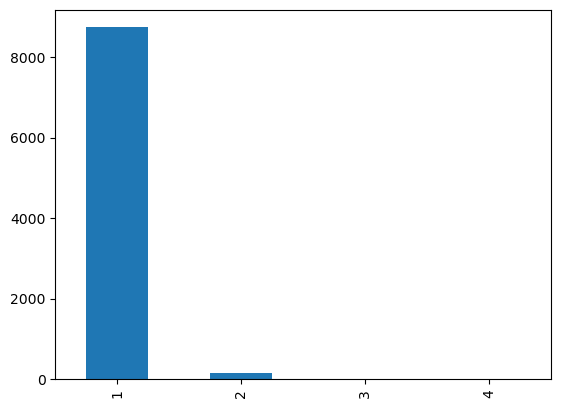

In [36]:
p = df['Volume'].value_counts()
print(p)

p.value_counts().plot.bar()

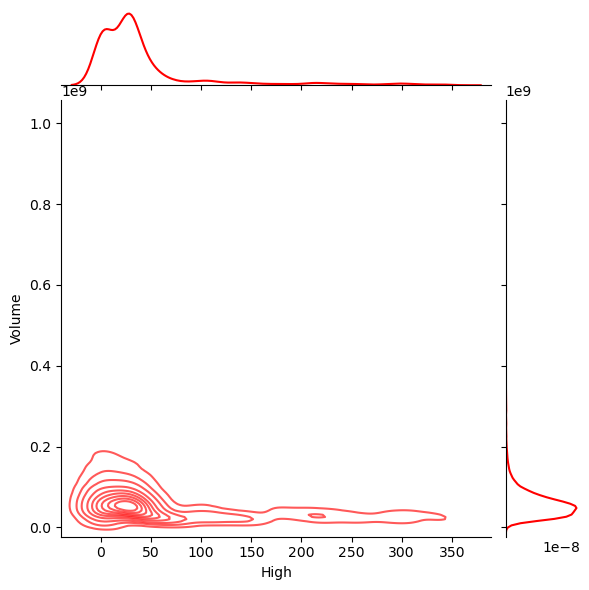

In [37]:
sns.jointplot(x = 'High', y = 'Volume',
              data = df, kind = 'kde', color = "red", alpha = 0.65)

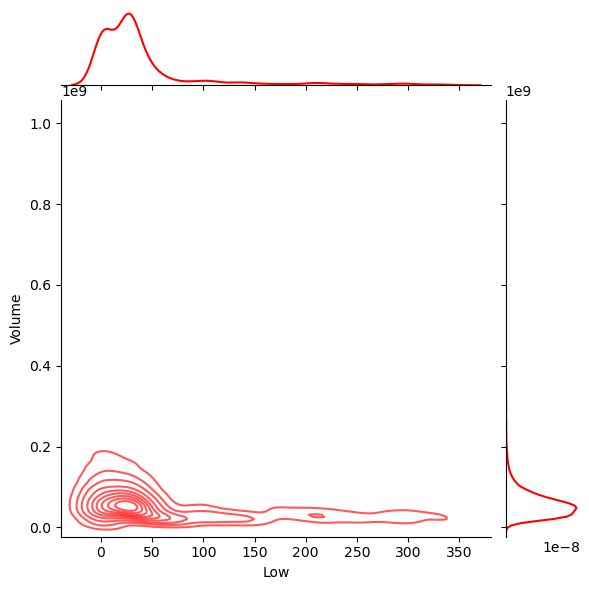

In [38]:
sns.jointplot(x = 'Low', y = 'Volume',
              data = df, kind = 'kde', color = "red", alpha = 0.65)

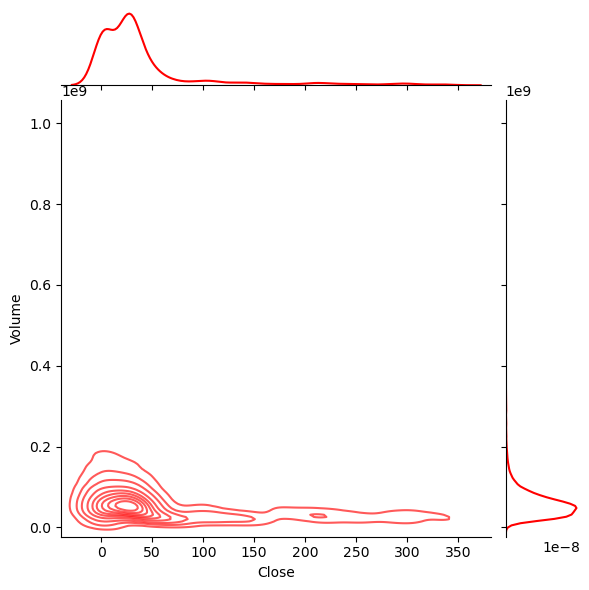

In [39]:
sns.jointplot(x = 'Close', y = 'Volume',
              data = df, kind = 'kde', color = "red", alpha = 0.65)

C:\Users\HP\AppData\Local\Temp\ipykernel_7332\3970261911.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



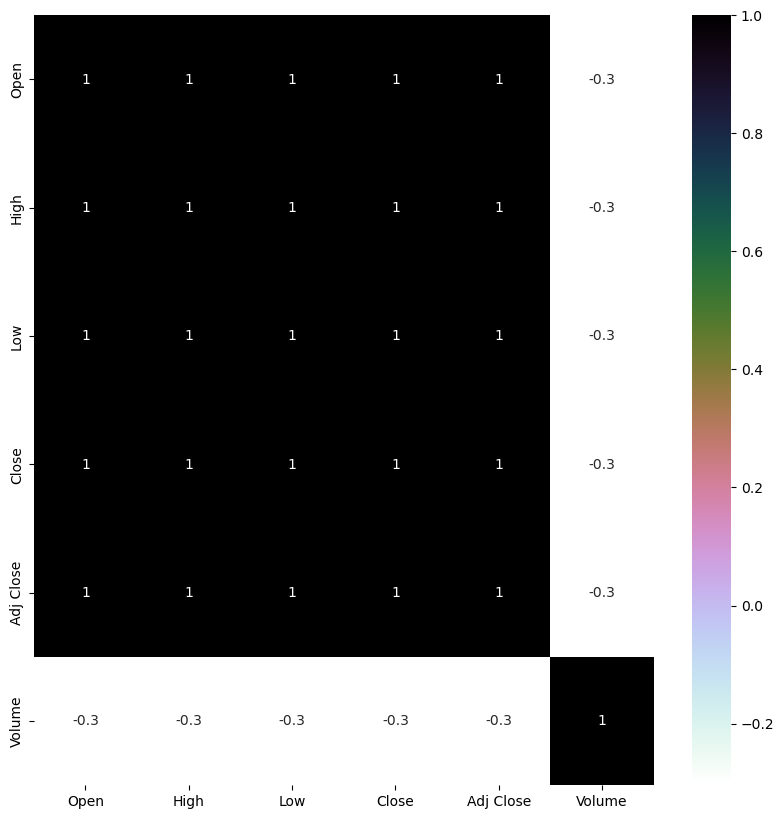

In [40]:
plt.figure(figsize=(10,10)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

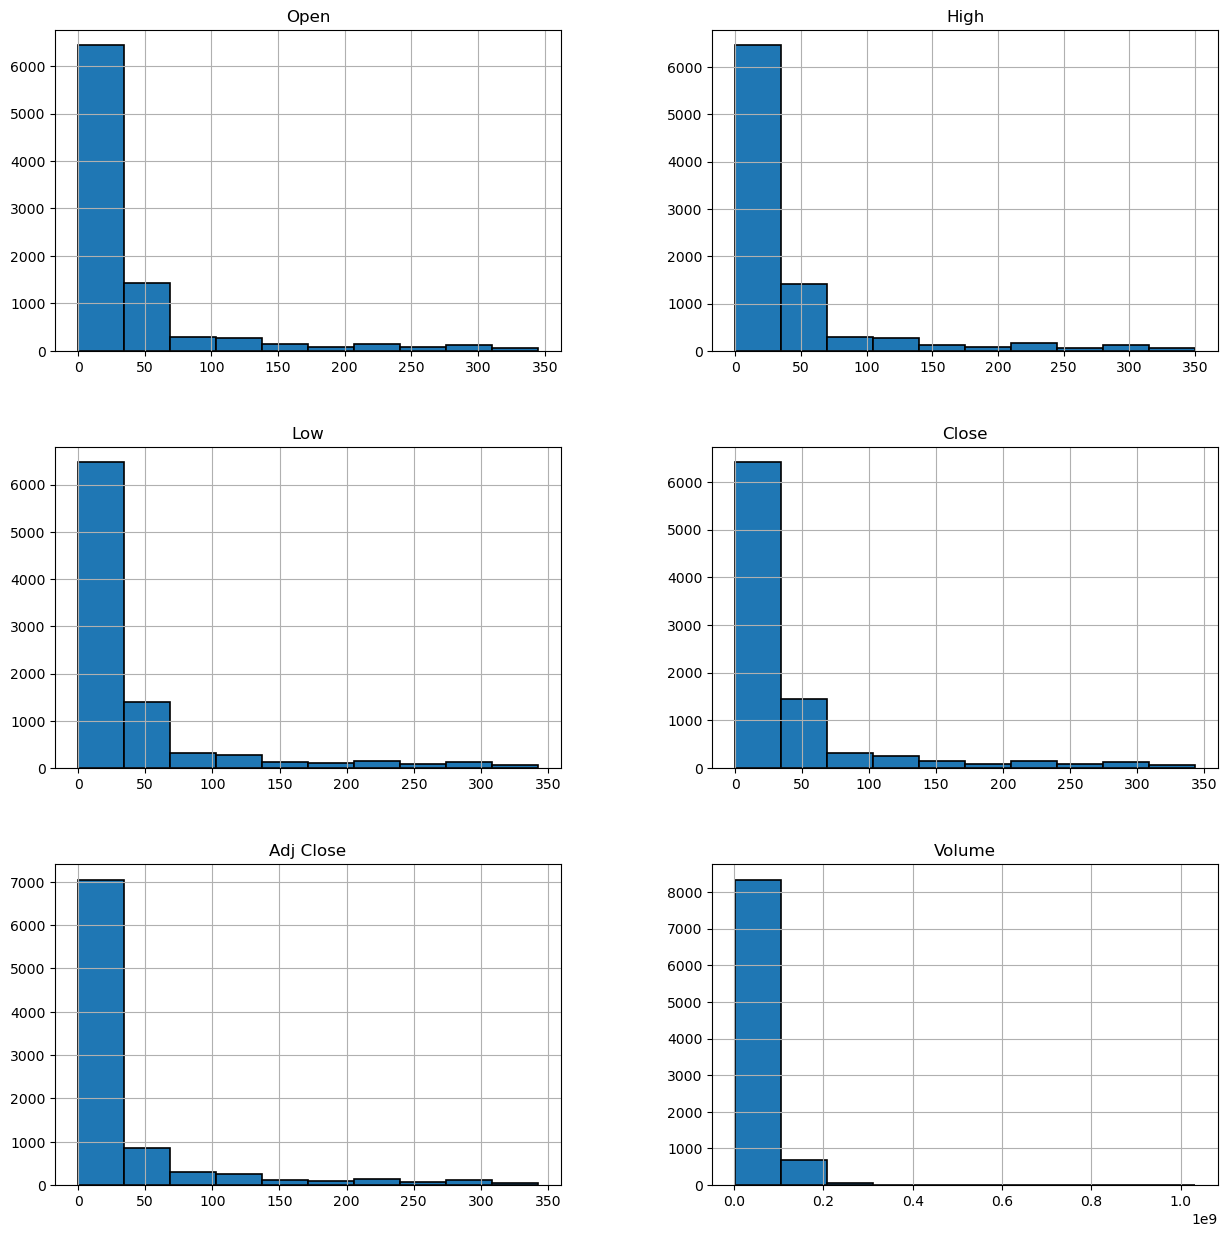

In [41]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

<Axes: xlabel='High', ylabel='Volume'>

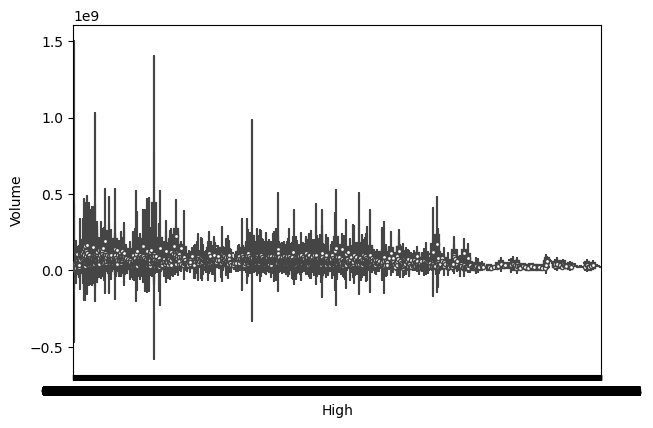

In [42]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='High',y='Volume',data=df)

In [60]:
#Make a pred by using ml algo


In [61]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [62]:
#feature Scalling

In [63]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [65]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [66]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions1 = lr.predict(X_test)
print(list(predictions1))

[0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0]


In [67]:
#Fitting Logistic Regression to the Training set 

In [68]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
clss = LogisticRegression(random_state = 0)
clss.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [69]:
# Predicting the Test set results
y_pred = clss.predict(X_test)
print(list(y_pred ))

[0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0]


In [70]:
#probability of all values
pr = clss.predict_proba(X_test)[0:10,:]
pr

array([[8.43664348e-01, 1.56335652e-01],
       [1.19065922e-03, 9.98809341e-01],
       [2.13781577e-02, 9.78621842e-01],
       [3.38249203e-02, 9.66175080e-01],
       [9.99946888e-01, 5.31121030e-05],
       [2.36352523e-02, 9.76364748e-01],
       [9.77335071e-01, 2.26649288e-02],
       [3.62880927e-01, 6.37119073e-01],
       [7.08963650e-02, 9.29103635e-01],
       [5.00186393e-01, 4.99813607e-01]])

In [71]:
#confusion matrix

In [72]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[15,  0],
       [ 0, 10]], dtype=int64)

<Axes: >

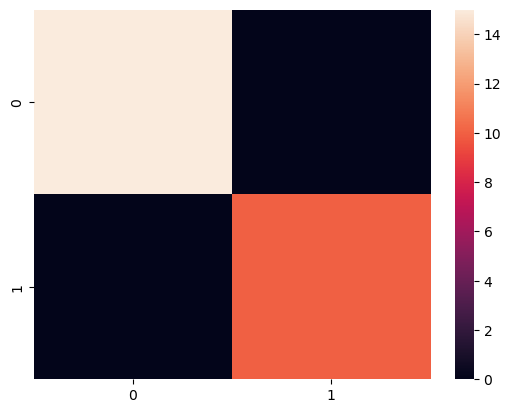

In [73]:
sns.heatmap(cm) 

In [74]:
#test Accuracy¶

In [75]:
from sklearn.metrics import accuracy_score
acclr = accuracy_score(y_test,predictions1)*100
acclr

100.0